In [2]:
import rmnn as rm
import collections
import numpy as np

parameters = collections.OrderedDict()
parameters['siren_1']=[2,256,1,4]
parameters['splitsiren_1']=[2,256,[10,10],4,'tucker']
#net='mulsiren',parameters=[2,256,[10,10],4,'tucker']
net = rm.represent.get_nn(net='composition',parameters=parameters)
data = np.random.random((2,3))
mask = np.zeros((2,3))
mask[0,2] = 1
data_train_loader,data_val_loader,data_test_loader = rm.toolbox.get_dataloader(x_mode='inr',batch_size=128,shuffle_if=False,data=data,mask=mask,xrange=1)

#print(net.G)

epoch  0 , loss =  0.89774585
epoch  100 , loss =  0.007336604
epoch  200 , loss =  0.0062742135
epoch  300 , loss =  0.0057582897
epoch  400 , loss =  0.005409304
epoch  500 , loss =  0.0051456518
epoch  600 , loss =  0.004927878
epoch  700 , loss =  0.00473398
epoch  800 , loss =  0.004552184
epoch  900 , loss =  0.004376777
MSE= 0.004212457275390625


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


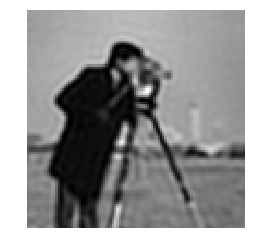

In [5]:
import rmnn as rm
import numpy as np
data = rm.toolbox.load_data('./data/img/Cameraman.jpg',data_type='rgb_img',data_shape=(100,100))
mask = rm.toolbox.load_mask(mask_type='random',random_rate=0.0,mask_path=None,data_shape=data.shape,mask_shape='same')
data_in = rm.toolbox.get_dataloader(x_mode='inr',batch_size=240**2,shuffle_if=False,data=data,mask=mask,xrange=1)
net = rm.represent.net(device=0,fid_name='mse',net_name='siren',parameters=[3,256,1,4],opt_name='Adam',lr=1e-3)

# data_in = rm.toolbox.get_dataloader(x_mode='splitinr',batch_size=240**2,shuffle_if=False,data=data,mask=mask,xrange=1)
# net = rm.represent.net(device=0,fid_name='mse',net_name='splitsiren',parameters=[3,256,[100,100,3],4,'tucker'],opt_name='Adam',lr=1e-3)

net.fit(data_in,epoch=1000,verbose=True)
net.test(data_in,data_shape=(100,100,3),show_if=True)

In [12]:
from scipy import io
import rmnn as rm
data_all =["C://Users//jamily//Desktop//LRTFR_Code//om6"] # video data.
for data in data_all:
    file_name = data+'gt.mat'
    mat = io.loadmat(file_name)
    X_np = mat["Ohsi"][:,:,:]
    print(X_np.shape)
rm.toolbox.save_data(data_path='./data/numpy/om6.npy',data_type='numpy',data=None)

(256, 256, 31)


In [18]:
import open3d as o3d
import numpy as np
pcd = o3d.io.read_point_cloud("C://Users//jamily//Desktop//LRTFR_Code//heartp0.05.pcd")
X_np = point = np.array(pcd.points)[:,:]
print(X_np.shape)

(299, 3)
